# Pengujian

In [126]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

waktu = str(datetime.datetime.now()).replace(":","-")

list_data = 'dice_tf-idf jaccard_tf-idf cosine_tf-idf dice_tf-idf-tf jaccard_tf-idf-tf cosine_tf-idf-tf dice_tf jaccard_tf cosine_tf'
list_data = list_data.split()

In [124]:

def true_false (a, b):
    sm = "sangat mirip"
    m =  "mirip"
    tm = "tidak mirip"
    stm = "sangat tidak mirip"
    #for a,b in zip(dataA,dataB):
    if a==b:
        return "correct"
    elif ((a == sm and b == m) or (b == sm and a == m )) or ((a == stm and b == tm) or (b == stm and a == tm))or ((a == m and b == tm) or (b == m and a == tm)):
         return "missed"
    else:
        return "wrong"

In [127]:
path = "hasil/pelabelan/"
nama_file = "hasil_transform_2019-05-01 10-41-30.032523_2.xlsx" #masukkan juga formatnya misal: nama_file.xlsx
f = pd.read_excel(path+nama_file, sheet_name = 'Sheet1')
f2 = pd.read_excel("data/jawaban_clean_jawaban buat label_1.xlsx", sheet_name = 'Sheet2')#hasil asli
f2 = f2[:100]

y_true = f2['Column4'].tolist()
target_names = ['sangat mirip', 'mirip', 'tidak mirip','sangat tidak mirip']
metode = list()
precision = list()
recall = list()
f1_score = list()

correctl = list()
missedl = list()
wrongl = list()


for x,i in enumerate(list_data):  
    data = f[i].tolist()
    y_pred = data
    #print(len(y_pred))
    metode.append(i)
    data_tf = list()
    for a,b in zip(y_true,y_pred):
        data_tf.append(true_false (a, b))    
    correct = 0
    missed = 0
    wrong = 0
    for km in data_tf:
        if km == "correct":
            correct +=1
        elif km == "missed":
            missed +=1
        elif km =="wrong":
            wrong +=1
    #print("panjang data_tf ", len(data_tf))
    pres = correct/(correct+wrong)
    precision.append(pres)
    rec =  correct/(correct+missed)
    recall.append(rec)
    fm = 2*pres*(rec/(rec+pres))
    f1_score.append(fm)
    
    correctl.append(correct)
    missedl.append(missed)
    wrongl.append(wrong)

dic3 = {
    "metode":metode ,
    "correct":correctl,
    "missed":missedl,
    "wrong":wrongl,
}

dic2 = {
    "metode":metode ,
    "precision":precision,
    "recall":recall,
    "f-Measure":f1_score,
}
df2 = pd.DataFrame.from_dict(dic2)
df3 = pd.DataFrame.from_dict(dic3)
#hasil tersimpan di -> hasil\pengujian -> lihat file paling terakhir
df2.to_excel('hasil\pengujian\hasil_pengujian_rouge'+waktu+'.xlsx')
print("Evaluation Using Rouge")
print("~"*23)

print(df3)
df2

Evaluation Using Rouge
~~~~~~~~~~~~~~~~~~~~~~~
              metode  correct  missed  wrong
0        dice_tf-idf       87      12      1
1     jaccard_tf-idf       58      34      8
2      cosine_tf-idf       87      12      1
3     dice_tf-idf-tf       87      12      1
4  jaccard_tf-idf-tf       58      34      8
5   cosine_tf-idf-tf       87      12      1
6            dice_tf       87      12      1
7         jaccard_tf       71      27      2
8          cosine_tf       89      10      1


,metode,precision,recall,f-Measure
0,dice_tf-idf,0.988636,0.878788,0.930481
1,jaccard_tf-idf,0.878788,0.630435,0.734177
2,cosine_tf-idf,0.988636,0.878788,0.930481
3,dice_tf-idf-tf,0.988636,0.878788,0.930481
4,jaccard_tf-idf-tf,0.878788,0.630435,0.734177
5,cosine_tf-idf-tf,0.988636,0.878788,0.930481
6,dice_tf,0.988636,0.878788,0.930481
7,jaccard_tf,0.972603,0.724490,0.830409
8,cosine_tf,0.988889,0.898990,0.941799


,metode,correct,missed,wrong
0,dice_tf-idf,87,12,1
1,jaccard_tf-idf,58,34,8
2,cosine_tf-idf,87,12,1
3,dice_tf-idf-tf,87,12,1
4,jaccard_tf-idf-tf,58,34,8
5,cosine_tf-idf-tf,87,12,1
6,dice_tf,87,12,1
7,jaccard_tf,71,27,2
8,cosine_tf,89,10,1


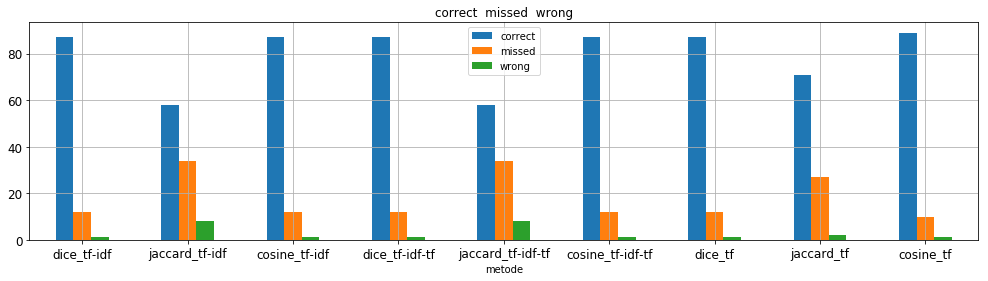

In [128]:
df3.plot.bar( x='metode',y=['correct', 'missed','wrong'], rot=0, title='correct  missed  wrong', figsize=(17,4), fontsize=12, grid=True)
df3

,metode,precision,recall,f-Measure
0,dice_tf-idf,0.988636,0.878788,0.930481
1,jaccard_tf-idf,0.878788,0.630435,0.734177
2,cosine_tf-idf,0.988636,0.878788,0.930481
3,dice_tf-idf-df,0.988636,0.878788,0.930481
4,jaccard_tf-idf-df,0.878788,0.630435,0.734177
5,cosine_tf-idf-df,0.988636,0.878788,0.930481
6,dice_df,0.988636,0.878788,0.930481
7,jaccard_df,0.972603,0.724490,0.830409
8,cosine_df,0.988889,0.898990,0.941799


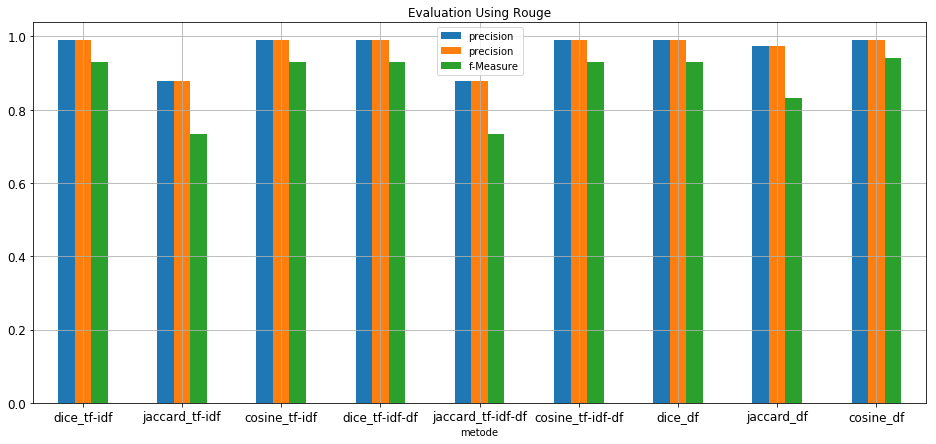

In [117]:
df2.plot.bar( x='metode',y=['precision', 'precision','f-Measure'], rot=0, title='Evaluation Using Rouge', figsize=(16,7), fontsize=12, grid=True)
df2